# PREDICTION OF WINE QUALITY

The wine quality prediction project used machine learning algorithms to predict wine quality based on several chemical metrics. The research project made use of two datasets from the UCI Machine Learning Repository: red and white wine samples. To acquire insights into the data, the datasets were preprocessed and exploratory data analysis was undertaken. 

To estimate wine quality, several machine learning methods were used, including logistic regression, support vector machines, and random forest. To identify the most relevant attributes for the models, feature selection was used. Following that, the models were tested using a variety of metrics like as accuracy, precision, recall, and F1 score.

Overall, the project demonstrated the importance of machine learning algorithms in predicting wine quality based on chemical parameters, as well as insights into the most important elements for prediction.


In [119]:
Name = 'Shivali Mavi'

Net_ID = 'SXM220124'

## Data Attributes

#### Input variables (based on physicochemical tests):
1 - fixed acidity - the amount of tartaric acid in the wine, measured in g/dm^3.

2 - volatile acidity - the amount of acetic acid in the wine, measured in g/dm^3.

3 - citric acid - the amount of citric acid in the wine, measured in g/dm^3.

4 - residual sugar - the amount of residual sugar in the wine, measured in g/dm^3.

5 - chlorides - the amount of salt in the wine, measured in g/dm^3.

6 - free sulfur dioxide - the amount of sulfur dioxide that is free in the wine, measured in mg/dm^3.

7 - total sulfur dioxide - the amount of sulfur dioxide that is free and bound in the wine, measured in mg/dm^3.

8 - density - the density of the wine, measured in g/cm^3.

9 - pH = the acidity level of the wine, measured on a scale of 0 to 14.

10 - sulphates - the amount of sulphates in the wine, measured in g/dm^3.

11 - alcohol - the alcohol content of the wine, measured in % vol.
   
#### Output variable (based on sensory data): 

12 - quality - the quality score of the wine, ranging from 0 to 10.

## Importing the libraries for analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [86]:
#Loading the red and white wine datasets from the
red_wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", 
                            delimiter=';')
red_wine['wine_type'] = 'red'

In [87]:
white_wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", 
                              delimiter=';')
white_wine['wine_type'] = 'white'


## Descriptive Statistics

In [88]:
print("To display top 5 rows for each variable in red wine dataset:")
red_wine.head()

To display top 5 rows for each variable in red wine dataset:


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality wine_type  
0      9.4        5       red  
1      9.8        5       red  
2      9.8        5       red  
3      9.8        6       red  
4      9.4        5       red

In [89]:
print("To display top 5 rows for each variable in white wine dataset:")
white_wine.head()

To display top 5 rows for each variable in white wine dataset:


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality wine_type  
0      8.8        6     white  
1      9.5        6     white  
2     10.1        6     white  
3      9.9        6     white  
4      9.9        6     white

In [7]:
print("Summary statistics for red wine dataset:")
red_wine.describe()

Summary statistics for red wine dataset:


fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [8]:
print("Summary statistics for red wine dataset:")
white_wine.describe()

Summary statistics for red wine dataset:


fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

#### Concatenate the two wine datasets into one for further analysis

In [90]:
wine_quality = pd.concat([red_wine, white_wine], ignore_index=True)

In [91]:
wine_quality = wine_quality.sample(frac=1).reset_index(drop=True)
wine_quality.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.9              0.72         0.01             1.9      0.076   
1            8.2              0.18         0.49             1.1      0.033   
2            6.6              0.26         0.28             9.4      0.028   
3            6.0              0.24         0.33             2.5      0.026   
4            7.1              0.34         0.31             5.2      0.032   
5            7.2              0.37         0.15             2.0      0.029   
6            6.7              0.64         0.23             2.1      0.080   
7            7.4              0.24         0.22            10.7      0.042   
8            6.8              0.14         0.35             1.5      0.047   
9            7.8              0.34         0.27             1.2      0.040   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                  7.0                  32.0  0.99668  3.39       0.54   
1                 28.0                  81.0  0.99230  3.00       0.68   
2                 13.0                 121.0  0.99254  3.17       0.34   
3                 31.0                  85.0  0.99014  3.13       0.50   
4                 36.0                 140.0  0.99166  3.35       0.47   
5                 27.0                  87.0  0.99030  3.30       0.59   
6                 11.0                 119.0  0.99538  3.36       0.70   
7                 26.0                  81.0  0.99540  2.86       0.36   
8                 40.0                 117.0  0.99111  3.07       0.72   
9                 25.0                 106.0  0.99320  3.01       0.55   

   alcohol  quality wine_type  
0      9.6        5       red  
1     10.4        7     white  
2     12.1        6     white  
3     11.3        7     white  
4     12.3        7     white  
5     12.6        7     white  
6     10.9        5       red  
7      9.7        6     white  
8     11.1        6     white  
9     10.4        5     white

In [14]:
#to display information about the dataset and its variables.
#number of variables, their names, their datatypes, and summary statistics.
print('Wine Quality data information:')
wine_quality.info()

Wine Quality data information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_type             6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [15]:
print("Summary statistics for aggregated wine dataset:")
wine_quality.describe()

Summary statistics for aggregated wine dataset:


fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6497.000000  6497.000000  6497.000000  6497.000000  
mean      3.218501     0.531268    10.491801     5.818378  
std       0.160787     0.148806     1.192712     0.873255  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

In [16]:
wine_quality.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_type               0
dtype: int64

### Correlation Matrix

#### a) For White Wine only.

In [17]:
white_wine_corr = white_wine.corr()
print("Correlation matrix for white wine dataset:")
white_wine_corr

Correlation matrix for white wine dataset:


fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.022697     0.289181   
volatile acidity          -0.022697          1.000000    -0.149472   
citric acid                0.289181         -0.149472     1.000000   
residual sugar             0.089021          0.064286     0.094212   
chlorides                  0.023086          0.070512     0.114364   
free sulfur dioxide       -0.049396         -0.097012     0.094077   
total sulfur dioxide       0.091070          0.089261     0.121131   
density                    0.265331          0.027114     0.149503   
pH                        -0.425858         -0.031915    -0.163748   
sulphates                 -0.017143         -0.035728     0.062331   
alcohol                   -0.120881          0.067718    -0.075729   
quality                   -0.113663         -0.194723    -0.009209   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.089021   0.023086            -0.049396   
volatile acidity            0.064286   0.070512            -0.097012   
citric acid                 0.094212   0.114364             0.094077   
residual sugar              1.000000   0.088685             0.299098   
chlorides                   0.088685   1.000000             0.101392   
free sulfur dioxide         0.299098   0.101392             1.000000   
total sulfur dioxide        0.401439   0.198910             0.615501   
density                     0.838966   0.257211             0.294210   
pH                         -0.194133  -0.090439            -0.000618   
sulphates                  -0.026664   0.016763             0.059217   
alcohol                    -0.450631  -0.360189            -0.250104   
quality                    -0.097577  -0.209934             0.008158   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                     0.091070  0.265331 -0.425858  -0.017143   
volatile acidity                  0.089261  0.027114 -0.031915  -0.035728   
citric acid                       0.121131  0.149503 -0.163748   0.062331   
residual sugar                    0.401439  0.838966 -0.194133  -0.026664   
chlorides                         0.198910  0.257211 -0.090439   0.016763   
free sulfur dioxide               0.615501  0.294210 -0.000618   0.059217   
total sulfur dioxide              1.000000  0.529881  0.002321   0.134562   
density                           0.529881  1.000000 -0.093591   0.074493   
pH                                0.002321 -0.093591  1.000000   0.155951   
sulphates                         0.134562  0.074493  0.155951   1.000000   
alcohol                          -0.448892 -0.780138  0.121432  -0.017433   
quality                          -0.174737 -0.307123  0.099427   0.053678   

                       alcohol   quality  
fixed acidity        -0.120881 -0.113663  
volatile acidity      0.067718 -0.194723  
citric acid          -0.075729 -0.009209  
residual sugar       -0.450631 -0.097577  
chlorides            -0.360189 -0.209934  
free sulfur dioxide  -0.250104  0.008158  
total sulfur dioxide -0.448892 -0.174737  
density              -0.780138 -0.307123  
pH                    0.121432  0.099427  
sulphates            -0.017433  0.053678  
alcohol               1.000000  0.435575  
quality               0.435575  1.000000

#### b) For Red Wine only.


In [18]:
red_wine_corr = red_wine.corr()
print("Correlation matrix for red wine dataset:")
red_wine_corr

Correlation matrix for red wine dataset:


fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.114777   0.093705            -0.153794   
volatile acidity            0.001918   0.061298            -0.010504   
citric acid                 0.143577   0.203823            -0.060978   
residual sugar              1.000000   0.055610             0.187049   
chlorides                   0.055610   1.000000             0.005562   
free sulfur dioxide         0.187049   0.005562             1.000000   
total sulfur dioxide        0.203028   0.047400             0.667666   
density                     0.355283   0.200632            -0.021946   
pH                         -0.085652  -0.265026             0.070377   
sulphates                   0.005527   0.371260             0.051658   
alcohol                     0.042075  -0.221141            -0.069408   
quality                     0.013732  -0.128907            -0.050656   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.113181  0.668047 -0.682978   0.183006   
volatile acidity                  0.076470  0.022026  0.234937  -0.260987   
citric acid                       0.035533  0.364947 -0.541904   0.312770   
residual sugar                    0.203028  0.355283 -0.085652   0.005527   
chlorides                         0.047400  0.200632 -0.265026   0.371260   
free sulfur dioxide               0.667666 -0.021946  0.070377   0.051658   
total sulfur dioxide              1.000000  0.071269 -0.066495   0.042947   
density                           0.071269  1.000000 -0.341699   0.148506   
pH                               -0.066495 -0.341699  1.000000  -0.196648   
sulphates                         0.042947  0.148506 -0.196648   1.000000   
alcohol                          -0.205654 -0.496180  0.205633   0.093595   
quality                          -0.185100 -0.174919 -0.057731   0.251397   

                       alcohol   quality  
fixed acidity        -0.061668  0.124052  
volatile acidity     -0.202288 -0.390558  
citric acid           0.109903  0.226373  
residual sugar        0.042075  0.013732  
chlorides            -0.221141 -0.128907  
free sulfur dioxide  -0.069408 -0.050656  
total sulfur dioxide -0.205654 -0.185100  
density              -0.496180 -0.174919  
pH                    0.205633 -0.057731  
sulphates             0.093595  0.251397  
alcohol               1.000000  0.476166  
quality               0.476166  1.000000

#### c) For both red and white wine together.

In [19]:
wine_corr = wine_quality.corr()
print("Correlation matrix for aggregated wine dataset:")
wine_corr

Correlation matrix for aggregated wine dataset:


fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000          0.219008     0.324436   
volatile acidity           0.219008          1.000000    -0.377981   
citric acid                0.324436         -0.377981     1.000000   
residual sugar            -0.111981         -0.196011     0.142451   
chlorides                  0.298195          0.377124     0.038998   
free sulfur dioxide       -0.282735         -0.352557     0.133126   
total sulfur dioxide      -0.329054         -0.414476     0.195242   
density                    0.458910          0.271296     0.096154   
pH                        -0.252700          0.261454    -0.329808   
sulphates                  0.299568          0.225984     0.056197   
alcohol                   -0.095452         -0.037640    -0.010493   
quality                   -0.076743         -0.265699     0.085532   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity              -0.111981   0.298195            -0.282735   
volatile acidity           -0.196011   0.377124            -0.352557   
citric acid                 0.142451   0.038998             0.133126   
residual sugar              1.000000  -0.128940             0.402871   
chlorides                  -0.128940   1.000000            -0.195045   
free sulfur dioxide         0.402871  -0.195045             1.000000   
total sulfur dioxide        0.495482  -0.279630             0.720934   
density                     0.552517   0.362615             0.025717   
pH                         -0.267320   0.044708            -0.145854   
sulphates                  -0.185927   0.395593            -0.188457   
alcohol                    -0.359415  -0.256916            -0.179838   
quality                    -0.036980  -0.200666             0.055463   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.329054  0.458910 -0.252700   0.299568   
volatile acidity                 -0.414476  0.271296  0.261454   0.225984   
citric acid                       0.195242  0.096154 -0.329808   0.056197   
residual sugar                    0.495482  0.552517 -0.267320  -0.185927   
chlorides                        -0.279630  0.362615  0.044708   0.395593   
free sulfur dioxide               0.720934  0.025717 -0.145854  -0.188457   
total sulfur dioxide              1.000000  0.032395 -0.238413  -0.275727   
density                           0.032395  1.000000  0.011686   0.259478   
pH                               -0.238413  0.011686  1.000000   0.192123   
sulphates                        -0.275727  0.259478  0.192123   1.000000   
alcohol                          -0.265740 -0.686745  0.121248  -0.003029   
quality                          -0.041385 -0.305858  0.019506   0.038485   

                       alcohol   quality  
fixed acidity        -0.095452 -0.076743  
volatile acidity     -0.037640 -0.265699  
citric acid          -0.010493  0.085532  
residual sugar       -0.359415 -0.036980  
chlorides            -0.256916 -0.200666  
free sulfur dioxide  -0.179838  0.055463  
total sulfur dioxide -0.265740 -0.041385  
density              -0.686745 -0.305858  
pH                    0.121248  0.019506  
sulphates            -0.003029  0.038485  
alcohol               1.000000  0.444319  
quality               0.444319  1.000000

#### To display correlation of each independent variable with our response variable 'quality'

In [20]:
#To compute pairwise correlations between the predictor variables and the response variable
correlations = wine_quality.corr()['quality'].drop('quality')

#To print the correlation coefficients in descending order
print(correlations.sort_values(ascending=False))

alcohol                 0.444319
citric acid             0.085532
free sulfur dioxide     0.055463
sulphates               0.038485
pH                      0.019506
residual sugar         -0.036980
total sulfur dioxide   -0.041385
fixed acidity          -0.076743
chlorides              -0.200666
volatile acidity       -0.265699
density                -0.305858
Name: quality, dtype: float64


In [21]:
#the ratings of quality present in our dataset
wine_quality['quality'].unique()

array([6, 7, 5, 8, 4, 3, 9], dtype=int64)

In [22]:
#the value count of each quality ratings present in our dataset
wine_quality['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [23]:
#the value count of each quality ratings present in red wine dataset
red_wine['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [24]:
#the value count of each quality ratings present in white wine dataset
white_wine['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

# Data Visualisations

## Subplots

The count of white and red wines for each range of alcohol concentration is shown in the stacked bar chart we made above.

The alcohol range bins that we made using the qcut() function are displayed on the chart's x-axis. The number of white and red wines that fit into each bin is represented on the y-axis.

White wine and red wine are represented by two stacked portions on each bar in the graph. The number of wines of each variety that fall within the associated alcohol range bin is shown by the height of each section.

The distribution of white and red wines across various alcohol range bins is clearly compared in the chart. We can see that the center two bins (between 7.9 and 10.9 in alcohol percentage) are more concentrated in both white and red wines than the outer two bins. Additionally, we can observe that the ratio of white to red wine varies throughout the various alcohol range bins. For instance, there are more white wines than red wines in the third bin, whereas there are more red wines than white wines in the fourth bin.

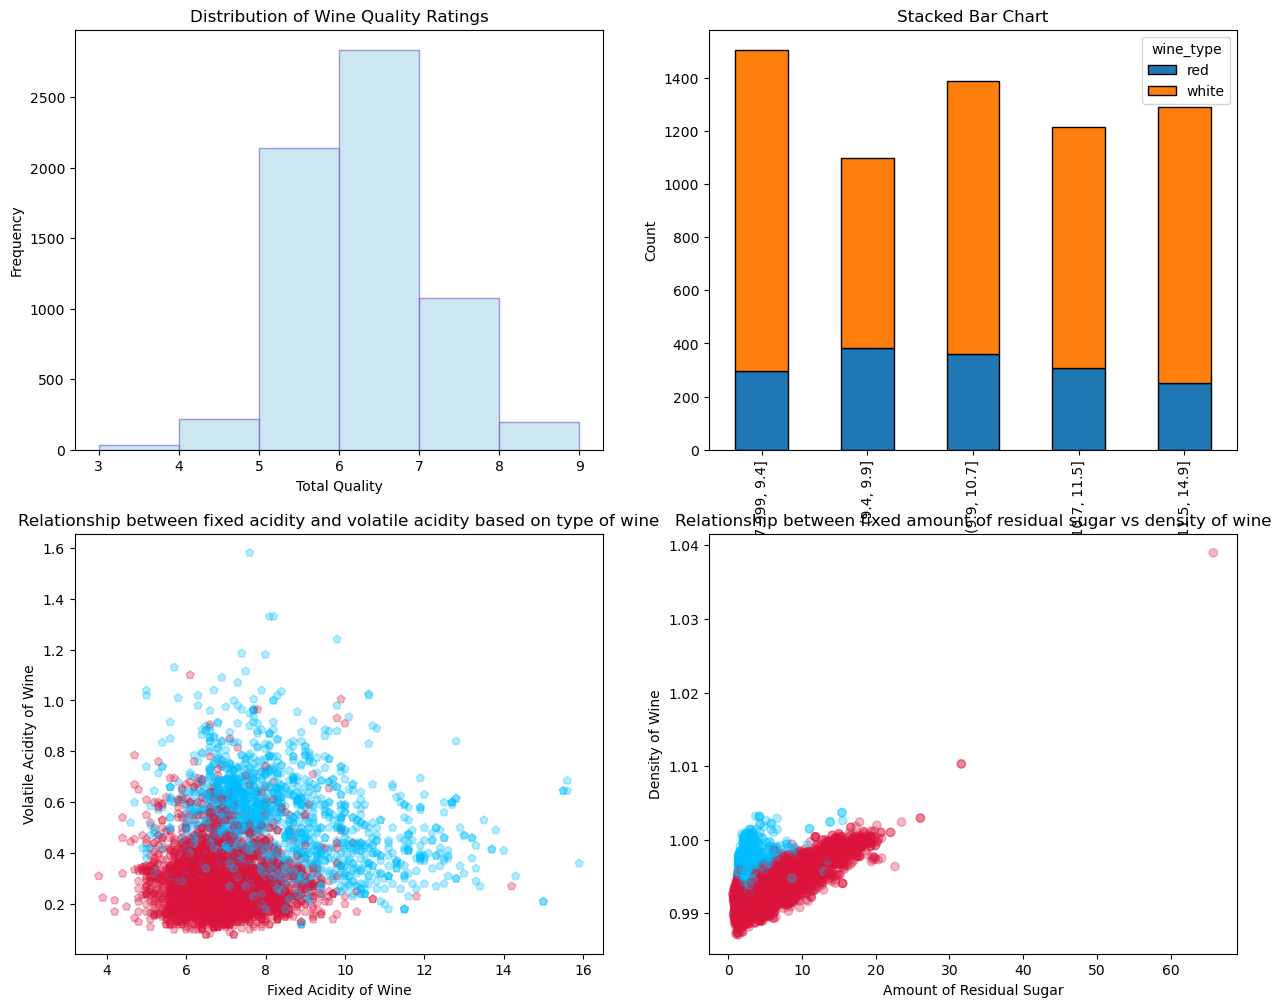

In [92]:
fig, axes = plt.subplots(2, 2, figsize=(15,12))

#to divide the data into bins based on the distribution of alcohol values
wine_quality['alcohol_range'] = pd.qcut(wine_quality['alcohol'], q=5)
#creating a pivot data table to create the stcaked barchart
pivot_data = wine_quality.pivot_table(index='alcohol_range', columns='wine_type', aggfunc='size')

#a stacked bar chart to display count of red and white wine for each range of alcohol content
pivot_data.plot(ax = axes[0, 1], kind='bar', stacked=True, edgecolor = "black", linewidth = 1)
axes[0, 1].set_xlabel('Alcohol range')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Stacked Bar Chart')

#plotting a histogram of the wine quality ratings
axes[0,0].hist(wine_quality["quality"], bins=6, color= 'lightblue', alpha = 0.6, ec = 'slateblue')
axes[0,0].set_xlabel("Total Quality")
axes[0,0].set_ylabel("Frequency")
axes[0,0].set_title("Distribution of Wine Quality Ratings")

#scatter plot representing relationship between fixed acidity and volatile acidity based on type of wine
colors = wine_quality["wine_type"].map({'red': "deepskyblue", 'white': "crimson"}) #defining colors variable  by each point based on 'sole' variable
axes[1,0].scatter(wine_quality["fixed acidity"], wine_quality["volatile acidity"], c=colors, alpha=0.3, marker = 'p')
axes[1,0].set_xlabel("Fixed Acidity of Wine")
axes[1,0].set_ylabel("Volatile Acidity of Wine")
axes[1,0].set_title("Relationship between fixed acidity and volatile acidity based on type of wine")

axes[1,1].scatter(wine_quality["residual sugar"], wine_quality["density"], c=colors, alpha=0.3)
axes[1,1].set_xlabel("Amount of Residual Sugar")
axes[1,1].set_ylabel("Density of Wine")
axes[1,1].set_title("Relationship between fixed amount of residual sugar vs density of wine")

plt.show()

## Box Plot

Box plots: Box plots can be used to visualize the distribution of a dataset through their quartiles. In this scenario, we're taking a look at the relationship between wine quality, the amount of alcohol, and wine type (red or white).

The x-axis shows the various wine quality ratings, which range from 3 to 9. The alcohol level of the wine is represented by the y-axis. The hue option is adjusted to wine type, which results in a separate box plot for red and white wines.

Each box plot represents the alcohol content distribution for a certain wine variety and quality level. The box indicates the interquartile range (IQR), which contains the data's middle 50%. The line inside the box illustrates the median or the data's midway. The whiskers extend to the minimum and maximum values from the lower and upper quartiles within 1.5 times the IQR. Any data points outside of the whiskers are considered outliers and are plotted as individual points. Furthermore, red wines have a greater median alcohol content than white wines across all quality categories. However, red wines have a larger range of alcohol content than white wines at each quality level.

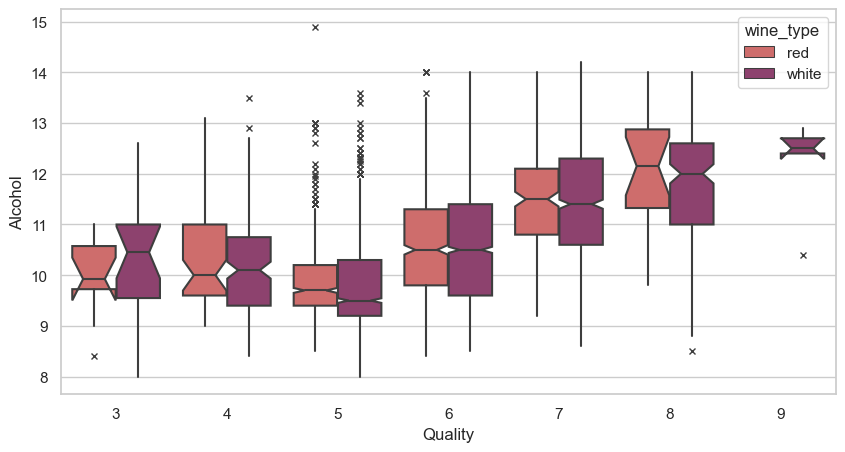

In [91]:
plt.figure(figsize=[10,5])
sns.set(style="whitegrid")
sns.boxplot(x='quality', y='alcohol', hue='wine_type', data=wine_quality, notch=True, showcaps=False, 
            flierprops={"marker": "x"}, palette = 'flare')
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.show()

## StripPlot

A strip plot is a type of data visualization tool that is used to show the distribution of continuous data. The strip plot is made for the wine dataset in this case, where the quality of wine is plotted against the volatile acidity, with the addition of wine type identification using colour. The plot depicts a group of points, one for each observation in the dataset. Each point shows the value of volatile acidity for a certain wine quality. The graphic aids in visualizing the distribution of volatile acidity values for each wine quality and type. It can also assist in identifying any potential outliers or patterns in the data.

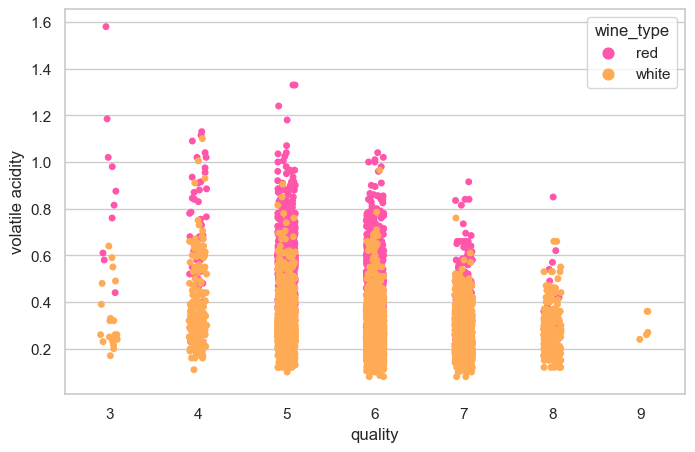

In [110]:
plt.figure(figsize=[8,5])
sns.stripplot(x='quality', y='volatile acidity', hue='wine_type', data=wine_quality, jitter=True, palette = 'spring')
plt.show()

## Violin Plot

A violin plot is a data visualization technique that combines a box plot and a kernel density plot. The box plot displays the data's median, interquartile range, and outliers, while the kernel density plot displays the distribution of data points. 

The plot below would demonstrate the distribution of citric acid levels for different quality ratings of both red and white wines. The x-axis would represent the various quality ratings, while the y-axis would represent the citric acid levels. The color parameter would be used to differentiate between the two varieties of wine. It would reveal, for example, whether there is a variation in the distribution of citric acid levels between red and white wines, as well as whether there is a link between citric acid levels and wine quality. 

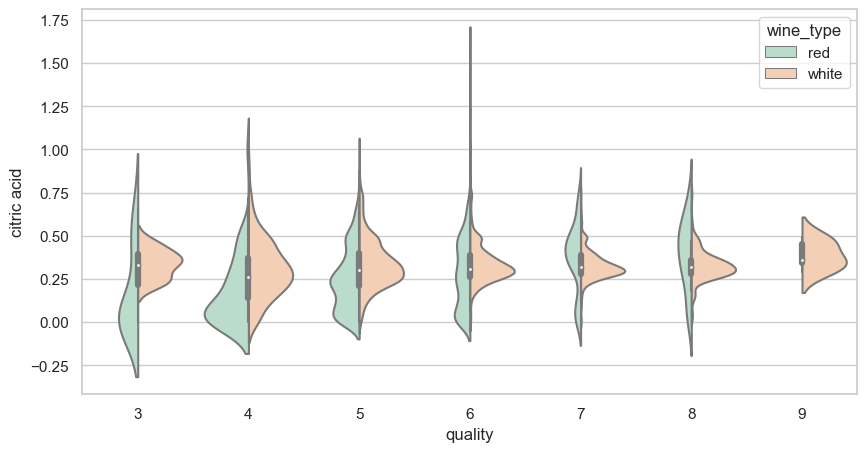

In [159]:
plt.figure(figsize=[10,5])
sns.violinplot(x='quality', y='citric acid', hue='wine_type', data=wine_quality, split=True, palette= 'Pastel2')
plt.show()

## Distplot

The distplot displays a histogram of the data as well as a smooth curve representing the estimated probability density function of the feature. The curve is a kernel density estimate (KDE) that depicts the general shape of the distribution of data. The density, or the relative frequency of values in each interval on the x-axis, is represented by the y-axis. The belo figure explains the central tendency, dispersion, and shape of the wine quality dataset's "fixed acidity" attribute.

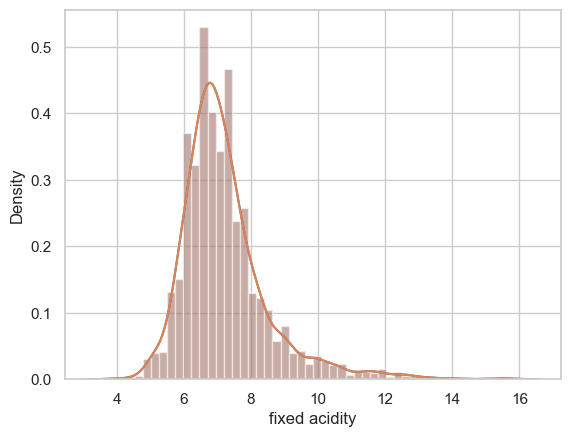

In [172]:
sns.distplot(wine_quality['fixed acidity'])
plt.show()

## Heatmaps

Heat maps: Heat maps can be used to visualize the correlation matrix between multiple variables. For example, you might want to create a heat map of the correlation matrix for all of the numeric variables in the wine dataset.

As we can see in the below heatmap, we have a color bar on the right of the heatmap. The interpretation is that, the darker the color of the area in a heatmap, the stronger is the relationship between two variables. The values of correlation are on the scale of -0.6 to 1 where 1 has the strongest positive (directly proportionalt) relationship and -0.5 has a strong negative relationship (inversely proportional).

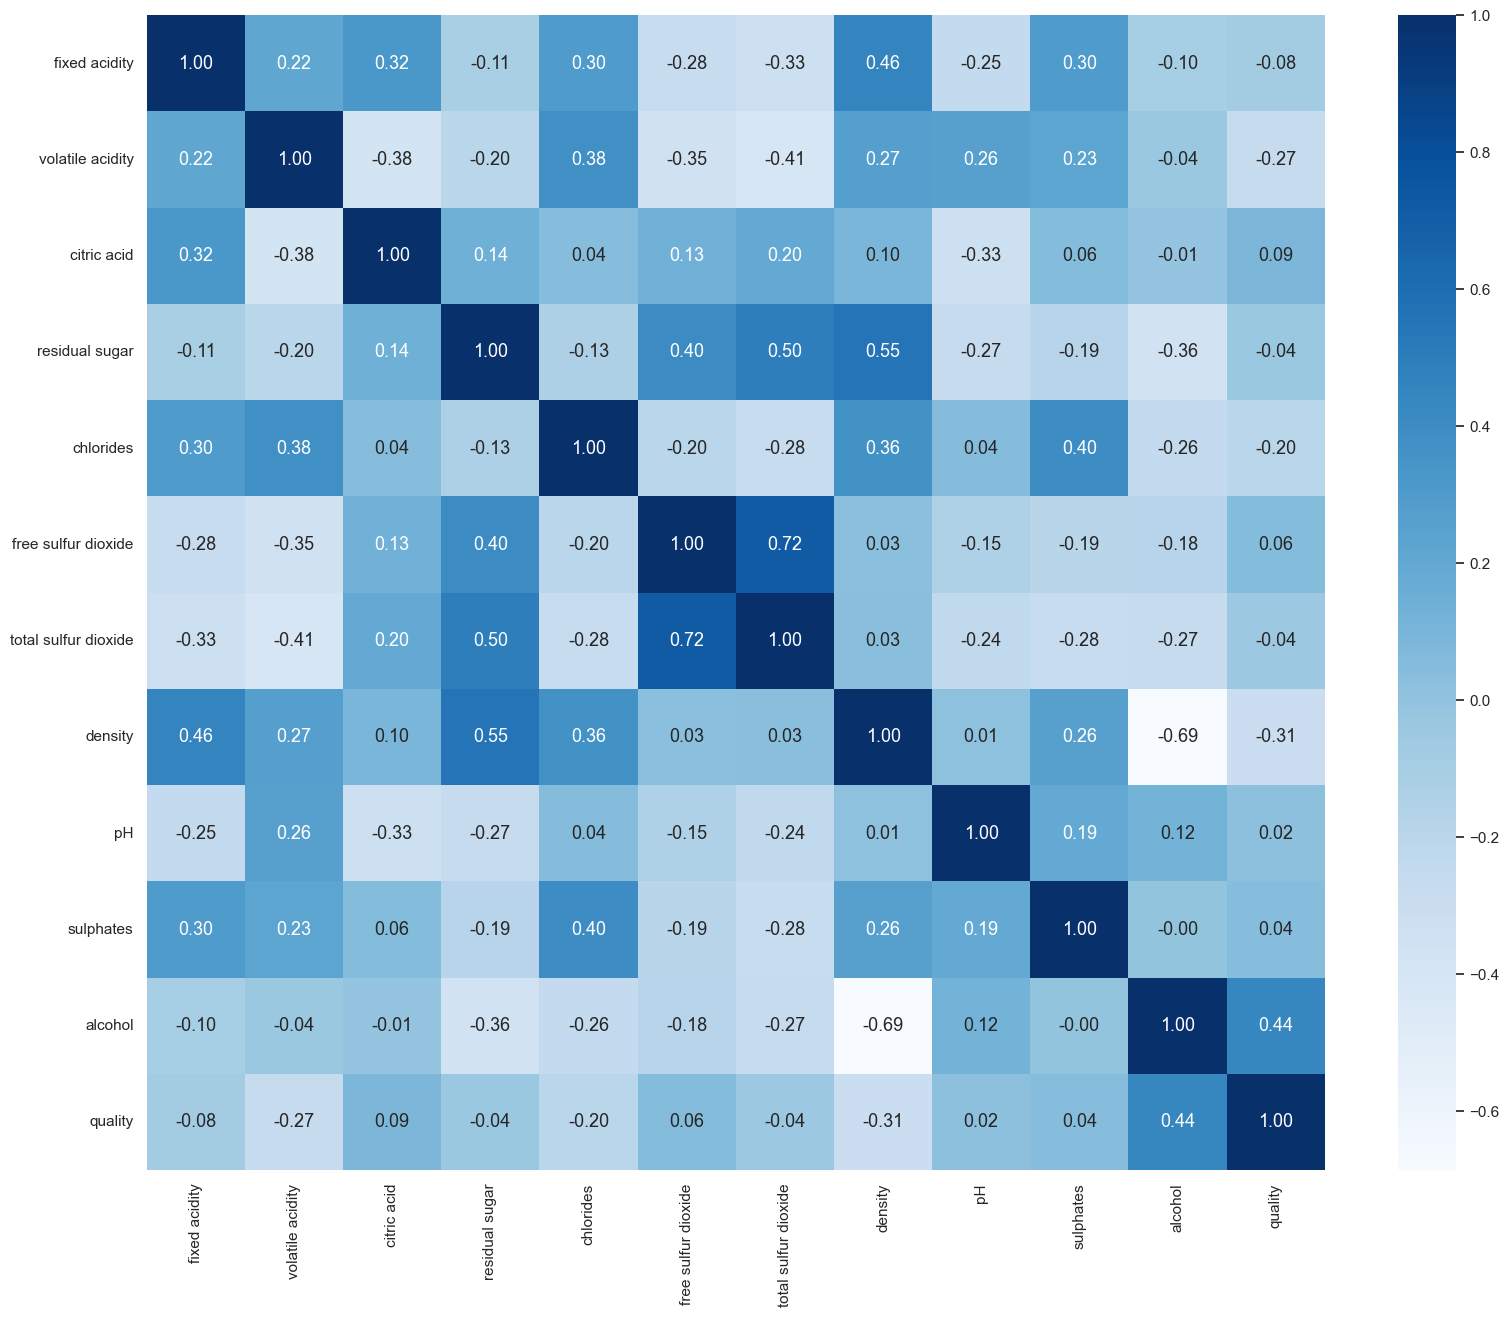

In [119]:
corr = wine_quality.corr()
plt.figure(figsize=[19,15])
sns.heatmap(corr, cbar = True, fmt = '.2f', cmap='Blues', annot = True, annot_kws={'size':13})
plt.show()

## Pairplots

A pairplot matrix is a type of scatterplot matrix that depicts the relationships between two variables in a dataset. In the example of the wine_quality dataset, the pairplot plots the relationship between all possible pairs of variables. The scatterplot of the two variables is given on the lower left triangle, the distribution of each variable is shown on the diagonal, and the correlation coefficient between the two variables is shown on the upper right triangle. Furthermore, the hue argument is used to color the scatterplots based on the wine_type variable, making it easy to differentiate between the two varieties of wine. The palette option specifies the color palette that will be utilized.

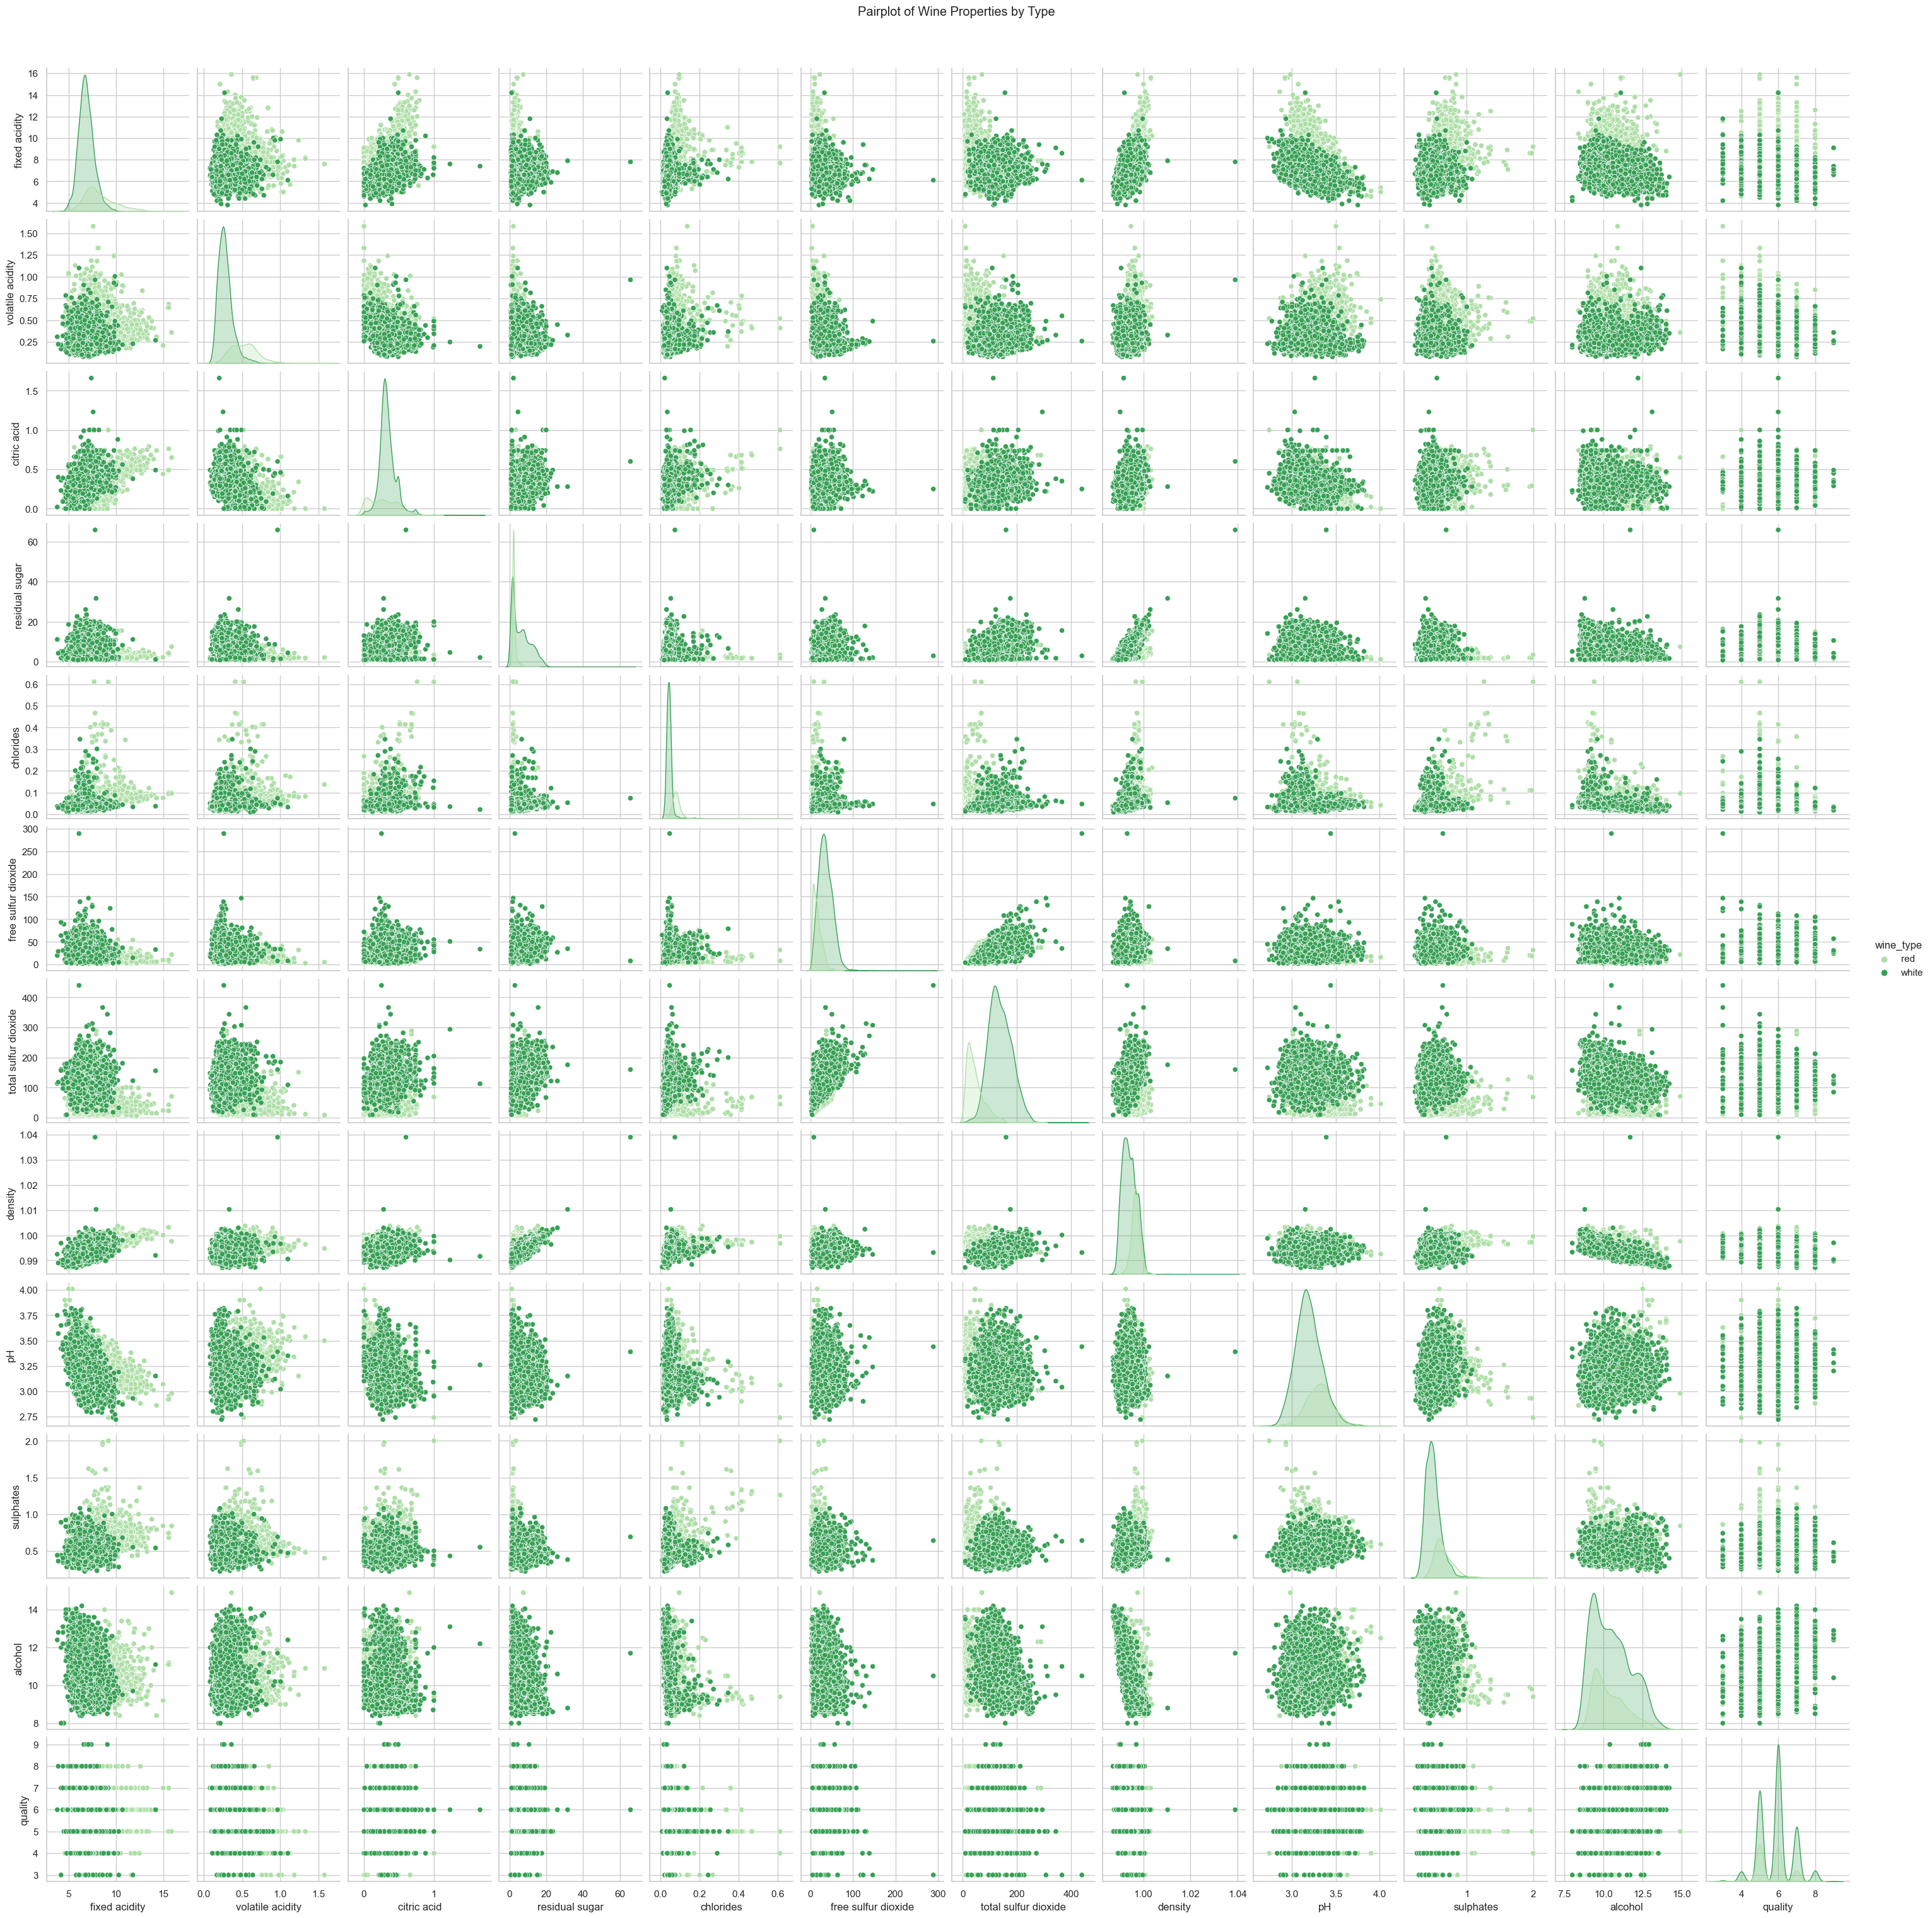

In [77]:
#Scatter matrix or a pairplot of the wine properties
sns.pairplot(wine_quality, hue='wine_type', palette = 'Greens')
plt.suptitle('Pairplot of Wine Properties by Type', y=1.02)

plt.show()

<Figure size 640x480 with 0 Axes>

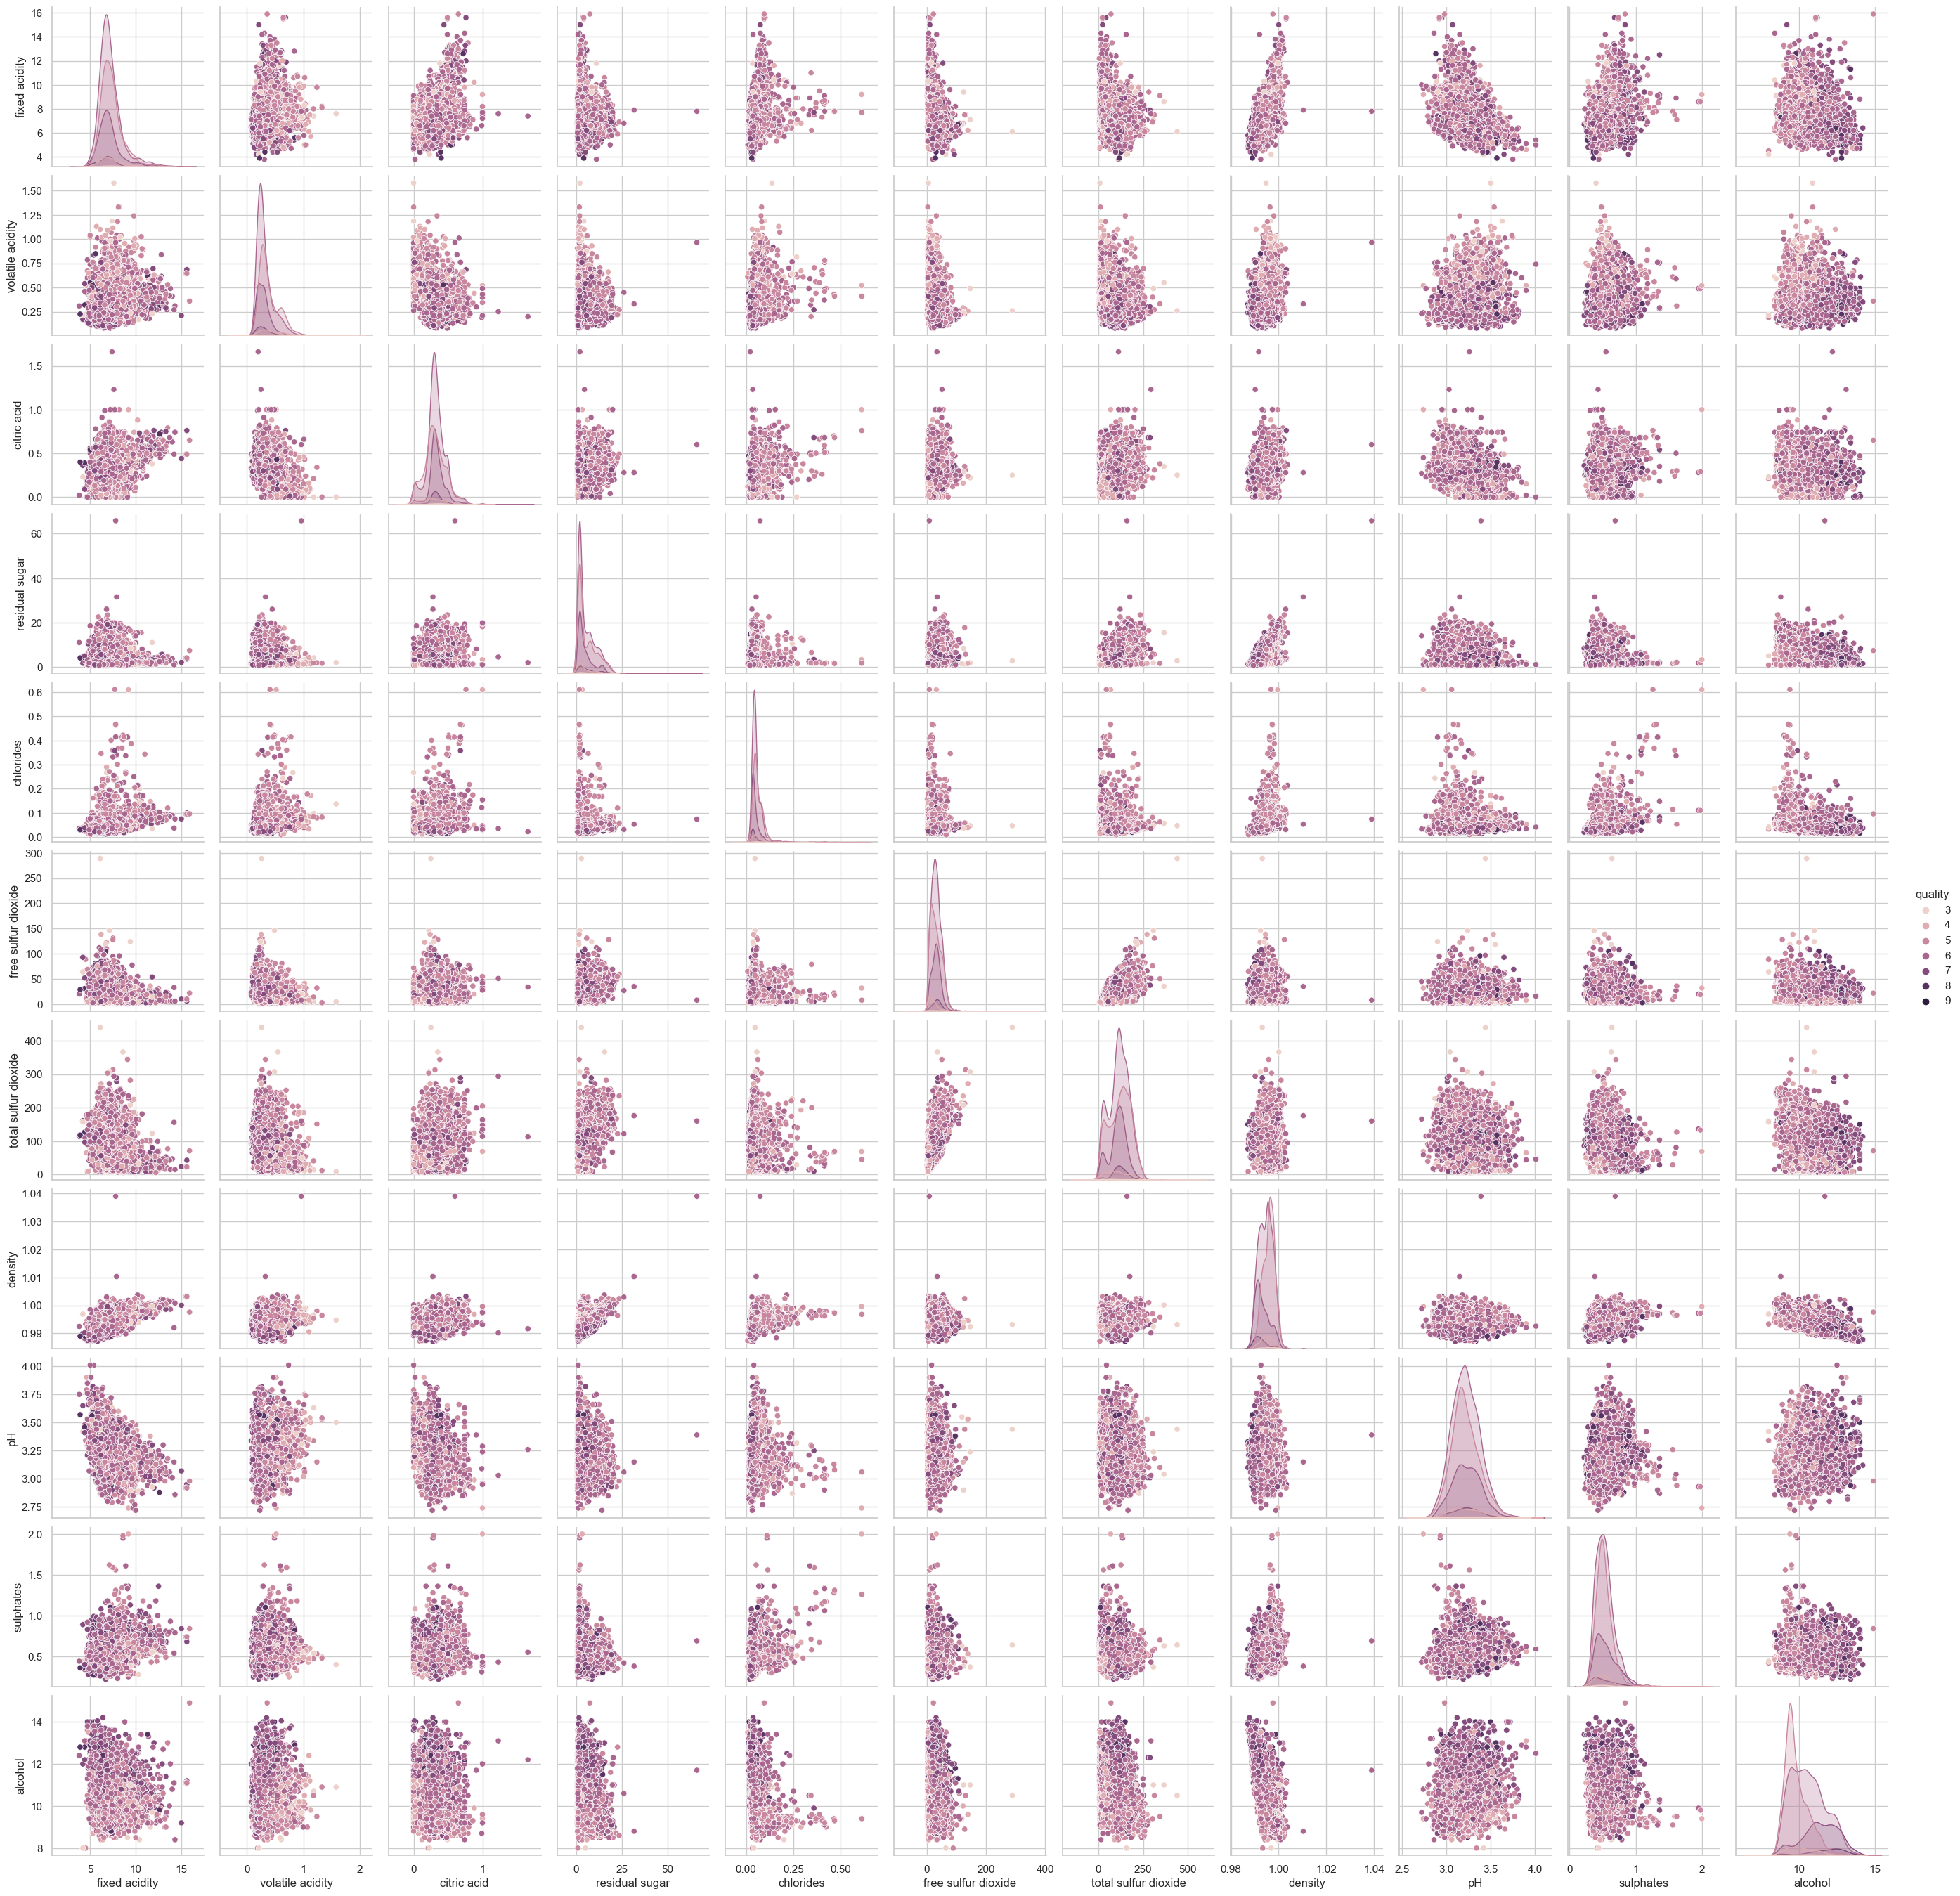

In [120]:
plt.figure()
sns.pairplot(wine_quality, hue = 'quality')
plt.show()

## Hypothesis Testing

Hypothesis: Red wine has higher quality scores than white wine.

This code calculates the mean quality scores for red and white wines, and performs a t-test to determine if the difference in means is statistically significant. The output will show the mean quality scores for each wine type and the p-value for the t-test. If the p-value is less than 0.05, we can reject the null hypothesis that there is no difference in quality scores between red and white wines, and conclude that there is a significant difference.

In [93]:
red_mean_quality = red_wine['quality'].mean()
white_mean_quality = white_wine['quality'].mean()

# Perform a t-test to determine if the difference in means is statistically significant
from scipy.stats import ttest_ind
t, p = ttest_ind(red_wine['quality'], white_wine['quality'], equal_var=False)

# Print the mean quality scores and p-value
print("Red Wine Mean Quality: {:.2f}".format(red_mean_quality))
print("White Wine Mean Quality: {:.2f}".format(white_mean_quality))
print(" ")
if p < 0.05:
    print("There is a significant difference in the mean quality score between red and white wines.")
else:
    print("There is no significant difference in the mean quality score between red and white wines.")

Red Wine Mean Quality: 5.64
White Wine Mean Quality: 5.88
 
There is a significant difference in the mean quality score between red and white wines.


### One way ANOVA test
This code reads in the red wine data and performs a One-Way ANOVA test to determine if there is a significant difference in the mean quality score among the two wine types, i.e., white or red. The results are printed in the form of an ANOVA table.

In [94]:
# Performing One-Way ANOVA on wine type
from statsmodels.formula.api import ols
model = ols('quality ~ wine_type', data=wine_quality).fit()

anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                sum_sq      df          F        PR(>F)
wine_type    70.530806     1.0  93.811807  4.888069e-22
Residual   4883.154895  6495.0        NaN           NaN


## Data Pre-processing

In [29]:
wine_quality.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            6.0              0.42         0.19             2.0      0.075   
1           11.1              0.18         0.48             1.5      0.068   
2            6.5              0.21         0.35             5.7      0.043   
3            7.6              0.39         0.32             3.6      0.035   
4            6.6              0.44         0.09             2.2      0.063   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 22.0                  47.0  0.99522  3.39       0.78   
1                  7.0                  15.0  0.99730  3.22       0.64   
2                 47.0                 197.0  0.99392  3.24       0.50   
3                 22.0                  93.0  0.99144  3.08       0.60   
4                  9.0                  18.0  0.99444  3.42       0.69   

   alcohol  quality wine_type alcohol_range  
0     10.0        6       red   (9.9, 10.7]  
1     10.1        6       red   (9.9, 10.7]  
2     10.1        6     white   (9.9, 10.7]  
3     12.5        7     white  (11.5, 14.9]  
4     11.3        6       red  (10.7, 11.5]

In [95]:
#Creating a binary column where 1 represents red wine and 0 represents white wine.
wine_quality['wine_type_binary'] = wine_quality['wine_type'].map({'white': 0, 'red': 1})
wine_quality.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.9              0.72         0.01             1.9      0.076   
1            8.2              0.18         0.49             1.1      0.033   
2            6.6              0.26         0.28             9.4      0.028   
3            6.0              0.24         0.33             2.5      0.026   
4            7.1              0.34         0.31             5.2      0.032   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                  7.0                  32.0  0.99668  3.39       0.54   
1                 28.0                  81.0  0.99230  3.00       0.68   
2                 13.0                 121.0  0.99254  3.17       0.34   
3                 31.0                  85.0  0.99014  3.13       0.50   
4                 36.0                 140.0  0.99166  3.35       0.47   

   alcohol  quality wine_type alcohol_range  wine_type_binary  
0      9.6        5       red    (9.4, 9.9]                 1  
1     10.4        7     white   (9.9, 10.7]                 0  
2     12.1        6     white  (11.5, 14.9]                 0  
3     11.3        7     white  (10.7, 11.5]                 0  
4     12.3        7     white  (11.5, 14.9]                 0

In [96]:
#dropping unnecessary columns
wine_qual = wine_quality.drop('alcohol_range', axis=1)

In [97]:
#dropping unnecessary columns
wine_qual = wine_qual.drop('wine_type', axis=1)

In [98]:
#dropping variable '' because it is highly correlated with the variable 'free sulfur dioxide'
wine_qual = wine_qual.drop('total sulfur dioxide', axis=1)
wine_qual.head()


#resulting dataframe has all the input variables except 'total sulfur dioxide' and the output varibles as well as 
#a binary variable which differentiates between white and red wine

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.9              0.72         0.01             1.9      0.076   
1            8.2              0.18         0.49             1.1      0.033   
2            6.6              0.26         0.28             9.4      0.028   
3            6.0              0.24         0.33             2.5      0.026   
4            7.1              0.34         0.31             5.2      0.032   

   free sulfur dioxide  density    pH  sulphates  alcohol  quality  \
0                  7.0  0.99668  3.39       0.54      9.6        5   
1                 28.0  0.99230  3.00       0.68     10.4        7   
2                 13.0  0.99254  3.17       0.34     12.1        6   
3                 31.0  0.99014  3.13       0.50     11.3        7   
4                 36.0  0.99166  3.35       0.47     12.3        7   

   wine_type_binary  
0                 1  
1                 0  
2                 0  
3                 0  
4                 0

In [99]:
#number of rows and columns 
wine_qual.shape

(6497, 12)

In [100]:
wine_quality['wine_type'].value_counts()

white    4898
red      1599
Name: wine_type, dtype: int64

In [101]:
wine_quality['wine_type'].value_counts(normalize=True)

white    0.753886
red      0.246114
Name: wine_type, dtype: float64

In [102]:
#This will store the result in new variable Y. It will be 1 when quality  is more than 7 and 0 when quality is less than 7
Y = wine_qual['quality'].apply(lambda y: 1 if y > 7 else 0)
Y

0       0
1       0
2       0
3       0
4       0
       ..
6492    0
6493    0
6494    0
6495    0
6496    0
Name: quality, Length: 6497, dtype: int64

In [103]:
from sklearn.preprocessing import StandardScaler

X = wine_qual.drop('quality', axis = 1) #all attributes except 'quality'

#to standardize the data
scaler = StandardScaler()
scaler.fit(X)
X_standard = scaler.transform(X)
X = X_standard
X

array([[ 0.52817634,  2.31032203, -2.12401256, ...,  0.05868313,
        -0.74776615,  1.75018984],
       [ 0.75959818, -0.96988404,  1.17934553, ...,  0.99957862,
        -0.07697409, -0.57136659],
       [-0.47465165, -0.48392759, -0.26587363, ..., -1.28545329,
         1.34845905, -0.57136659],
       ...,
       [ 1.06816064,  1.85473786, -0.47233351, ...,  0.46192405,
        -0.41237012,  1.75018984],
       [ 1.14530125, -0.1802048 ,  2.83102457, ...,  2.34371504,
        -1.50240722, -0.57136659],
       [ 0.8367388 , -0.48392759,  0.69760581, ...,  1.80606047,
        -0.91546416,  1.75018984]])

## FEATURE SELECTION

In [104]:

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
X = wine_qual

# Create a logistic regression model
logreg = LogisticRegression()

# Apply RFE to select the top 5 features
selector = RFE(logreg, n_features_to_select=6)
X_rfe = selector.fit_transform(X, Y)

# Get the indices of the selected features
indices = selector.get_support(indices=True)
selected_features = X.columns[selector.support_]
print("Selected features:", selected_features)

Selected features: Index(['fixed acidity', 'residual sugar', 'sulphates', 'alcohol', 'quality',
       'wine_type_binary'],
      dtype='object')


## Machine Learning Algorithms

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, r2_score, precision_score, recall_score, f1_score

#Splitting the dataset into training and testing dataset where testing dataset size is 20%
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=.2,random_state=42)

#creating a logistic regression instance and fitting the model
logreg = LogisticRegression(random_state = 0)
logreg.fit(X_train, Y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluate the performance of the mode
accuracy1 = logreg.score(X_train, Y_train)
print(f"Logistic Regression Prediction Accuracy: {accuracy1:.4f}")
accuracy = accuracy_score(Y_test, y_pred)
print(f"Logistic Regression Prediction Accuracy: {accuracy:.4f}")

Logistic Regression Prediction Accuracy: 1.0000
Logistic Regression Prediction Accuracy: 1.0000


In [110]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to search
hyperparameters = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}

# Perform a grid search to find the best hyperparameters
grid_search = GridSearchCV(LogisticRegression(), hyperparameters, cv=5)
grid_search.fit(X_train, Y_train)
best_params = grid_search.best_params_
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'C': 0.1, 'penalty': 'l2'}


In [111]:
# Evaluate the model using confusion matrix and classification report
print('Confusion matrix:')
print(confusion_matrix(Y_test, y_pred))
print('Classification report:')
print(classification_report(Y_test, y_pred))

# Interpret model coefficients
coef_df = pd.DataFrame({'predictor': X_train.columns, 'coefficient': logreg.coef_[0]})
coef_df['odds_ratio'] = np.exp(coef_df['coefficient'])
print("Model Coefficients: ")
print(coef_df)

Confusion matrix:
[[1263    0]
 [   0   37]]
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1263
           1       1.00      1.00      1.00        37

    accuracy                           1.00      1300
   macro avg       1.00      1.00      1.00      1300
weighted avg       1.00      1.00      1.00      1300

Model Coefficients: 
              predictor  coefficient   odds_ratio
0         fixed acidity    -0.064493     0.937543
1      volatile acidity    -0.777776     0.459427
2           citric acid     0.356072     1.427711
3        residual sugar     0.079616     1.082871
4             chlorides    -0.041045     0.959786
5   free sulfur dioxide     0.004155     1.004164
6               density    -1.238427     0.289840
7                    pH     0.189854     1.209073
8             sulphates     0.744676     2.105759
9               alcohol     0.259882     1.296777
10              quality     7.6132

## Support Vector Machine

In support vector machine (SVM) classification, the choice of kernel function plays a crucial role in determining the decision boundary between the classes. The SVM algorithm constructs a hyperplane or a set of hyperplanes in a high-dimensional space, which can be used for classification or regression. The kernel trick is a method for mapping data from a low-dimensional space to a high-dimensional space, allowing the SVM to perform well on complex datasets.

In the case of wine quality dataset, we can use SVM with the RBF (radial basis function) kernel to create a model. The RBF kernel is a popular choice for SVM because it is capable of handling non-linearly separable data by projecting it into a higher-dimensional space.

In [113]:
from sklearn.svm import SVC
  
svc_rbf = SVC(kernel = 'rbf', random_state = 0)

svc_rbf.fit(X_train, Y_train)

# Evaluate the SVM model on the testing set
y_pred = svc_rbf.predict(X_test)

# Evaluate the performance of the model
print('SVM Training Accuracy:', svc_rbf.score(X_train, Y_train))
accuracy = accuracy_score(Y_test, y_pred)
print("SVM Prediction Accuracy:", accuracy)


# Evaluate the model on the test set
y_pred = grid_search.predict(X_test)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(Y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(Y_test, y_pred))


SVM Training Accuracy: 0.9690205888012314
SVM Prediction Accuracy: 0.9715384615384616
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1263
           1       1.00      1.00      1.00        37

    accuracy                           1.00      1300
   macro avg       1.00      1.00      1.00      1300
weighted avg       1.00      1.00      1.00      1300

Confusion Matrix:
[[1263    0]
 [   0   37]]


## KNN Classifier

We can employ the KNN algorithm to predict wine quality based on its chemical attributes for the wine quality dataset. Cross-validation techniques such as k-fold cross-validation can be used to identify the ideal value of k. We can use the KNN model to forecast the quality of wine for the test set once we have determined the optimal value of k. Finally, we may assess the KNN model's performance using metrics such as accuracy, precision, recall, and F1-score.

In [115]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn = knn.fit(X_train, Y_train)

#making predictions on the testing data
y_pred = knn.predict(X_test)

#accuracy of the classifier
accuracy = knn.score(X_test, Y_test)
print('Accuracy for Training Data:', knn.score(X_train, Y_train))
print(f"Accuracy for Test Data: {accuracy:.2f}")
precision = precision_score(Y_test, y_pred)
print("Precision:", precision)
recall = recall_score(Y_test, y_pred)
print("Recall:", recall)
f1 = f1_score(Y_test, y_pred)
print("F1 score:", f1)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(Y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(Y_test, y_pred))

Accuracy for Training Data: 0.983644410236675
Accuracy for Test Data: 0.98
Precision: 1.0
Recall: 0.32432432432432434
F1 score: 0.489795918367347
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1263
           1       1.00      0.32      0.49        37

    accuracy                           0.98      1300
   macro avg       0.99      0.66      0.74      1300
weighted avg       0.98      0.98      0.98      1300

Confusion Matrix:
[[1263    0]
 [  25   12]]


## Random Forest Classifier

To implement the random forest classifier on the wine quality dataset, divide it into training and testing sets, fit the model on the training set, then evaluate its performance on the testing set. We can also tune the model's hyperparameters, such as the number of trees, maximum depth of trees, and so on, to increase its performance.

The algorithm works by randomly selecting a subset of features and data points to create a decision tree. This process is repeated multiple times to create multiple decision trees. The final prediction is made by aggregating the predictions of all the individual decision trees.

In [116]:
from sklearn.ensemble import RandomForestClassifier

# Creating Random Forest object and fitting it to the training set
rf_model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf_model.fit(X_train, Y_train)

# Predicting the wine quality using the test set
rf_y_pred = rf_model.predict(X_test)
accuracy = rf_model.score(X_test, Y_test)

#accuracy of the classifier
print('Accuracy for Training Data:', rf_model.score(X_train, Y_train))
print(f"Accuracy for Test Data: {accuracy:.4f}")
precision = precision_score(Y_test, y_pred)
print("Precision:", precision)
recall = recall_score(Y_test, y_pred)
print("Recall:", recall)
f1 = f1_score(Y_test, y_pred)
print("F1 score:", f1)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(Y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(Y_test, y_pred))

Accuracy for Training Data: 1.0
Accuracy for Test Data: 1.0000
Precision: 1.0
Recall: 0.32432432432432434
F1 score: 0.489795918367347
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1263
           1       1.00      0.32      0.49        37

    accuracy                           0.98      1300
   macro avg       0.99      0.66      0.74      1300
weighted avg       0.98      0.98      0.98      1300

Confusion Matrix:
[[1263    0]
 [  25   12]]


In [60]:
rf_model.feature_importances_

array([0.00890261, 0.02647004, 0.02295877, 0.03110028, 0.02656382,
       0.02320119, 0.03168436, 0.01973204, 0.02567035, 0.06175973,
       0.7219568 , 0.        ])

## Gaussian Naive Bayes

The wine quality dataset has multiple classes, so GaussianNB will estimate the mean and standard deviation of each feature for each class in the training data. If your data does not meet the assumptions of GaussianNB, you may want to consider using another algorithm or preprocessing your data to transform it to a normal distribution.

In [71]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, Y_train)
y_pred = gnb.predict(X_test)
accuracy = gnb.score(X_test, Y_test)


#accuracy of the classifier
print('Accuracy for Training Data:', gnb.score(X_train, Y_train))
print(f"Accuracy for Test Data: {accuracy:.2f}")
precision = precision_score(Y_test, y_pred)
print("Precision:", precision)
recall = recall_score(Y_test, y_pred)
print("Recall:", recall)
f1 = f1_score(Y_test, y_pred)
print("F1 score:", f1)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(Y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(Y_test, y_pred))

Accuracy for Training Data: 0.9955743698287474
Accuracy for Test Data: 0.99
Precision: 1.0
Recall: 0.7948717948717948
F1 score: 0.8857142857142858
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1261
           1       1.00      0.79      0.89        39

    accuracy                           0.99      1300
   macro avg       1.00      0.90      0.94      1300
weighted avg       0.99      0.99      0.99      1300

Confusion Matrix:
[[1261    0]
 [   8   31]]


## Conclusion

According to the accuracy scores, the Random Forest Classifier (RFC) had the greatest accuracy of 1, indicating that it successfully predicted all of the wine grade labels. It is crucial to remember, however, that this could signal overfitting on the training data.

The Logistic Regression model has the second highest accuracy score of 0.9994, which is also a very strong number and suggests that the model can predict wine quality labels well.

The accuracy score of the KNN Classifier is 0.9836, which is somewhat lower than that of the Logistic Regression model and the GaussianNB model. However, it is still a good rating, indicating that the model can accurately estimate wine quality labels.

The GaussianNB model has an accuracy value of 0.9956, which is extremely close to the accuracy score of the Logistic Regression model. This implies that the GaussianNB model is also a viable option for forecasting wine quality labels.

The Support Vector Machine model has the lowest accuracy score of 0.9694, which is still good but not as good as the other models. As a result, the SVM model may not be the ideal choice for predicting wine quality labels in this dataset.